In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

from src.fetch_data import DataFetcher

O código a seguir consulta os dados dos aerogeradores com um *delay* de 1 segundo entre requisições à API, a fim de que não fosse excedida uma taxa de 60 chamadas por minuto. Na documentação da API, eu não encontrei um limite para essa taxa, mas caso ela possa ser maior que esse valor, o usuário pode reduzir o intervalo de tempo entre requisições com o argumento `seconds_between_requests`, e assim acelerar o processo de aquisição dos dados.

No momento em que escrevo, o código abaixo demora em torno de 35 segundos para coletar dados de 23522 aerogeradores.

In [2]:
url = 'https://sigel.aneel.gov.br/arcgis/rest/services/PORTAL/WFS/MapServer/0/query'
parameters = {'where': '1=1', 'outFields': '*', 'f': 'geojson'}
fetcher = DataFetcher(url, parameters)
fetcher.fetch_all_pages(seconds_between_requests=1)
data = geopandas.GeoDataFrame.from_features(fetcher.data)
data

INFO:root:Fetched 1000 results. Total so far: 1000
INFO:root:Fetched 1000 results. Total so far: 2000
INFO:root:Fetched 1000 results. Total so far: 3000
INFO:root:Fetched 1000 results. Total so far: 4000
INFO:root:Fetched 1000 results. Total so far: 5000
INFO:root:Fetched 1000 results. Total so far: 6000
INFO:root:Fetched 1000 results. Total so far: 7000
INFO:root:Fetched 1000 results. Total so far: 8000
INFO:root:Fetched 1000 results. Total so far: 9000
INFO:root:Fetched 1000 results. Total so far: 10000
INFO:root:Fetched 1000 results. Total so far: 11000
INFO:root:Fetched 1000 results. Total so far: 12000
INFO:root:Fetched 1000 results. Total so far: 13000
INFO:root:Fetched 1000 results. Total so far: 14000
INFO:root:Fetched 1000 results. Total so far: 15000
INFO:root:Fetched 1000 results. Total so far: 16000
INFO:root:Fetched 1000 results. Total so far: 17000
INFO:root:Fetched 1000 results. Total so far: 18000
INFO:root:Fetched 1000 results. Total so far: 19000
INFO:root:Fetched 100

,geometry,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,VERSAO,DATUM_EMP,OPERACAO,FUSO_AG,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG
0,POINT (-42.64249 -14.47097),1.850,121.25,80.0,82.5,1666625847000,30739.0,Caititu,CAI-083,754125.0000,8.398879e+06,Versão Válida,WGS84,Sim,UTM 23 S (MER -45),Central Eólica Caititu S.A.,None,1,BA,EOLCVBA030739-4-01
1,POINT (-35.92447 -5.11575),2.000,145.00,95.0,100.0,1666625847000,30512.0,Dreen Boa Vista,BV07,175728.0000,9.433802e+06,Versão Válida,SIRGAS2000,Sim,UTM 25 S (MER -33),GE Boa Vista S.A.,None,2,RN,EOLCVRN030512-0-01
2,POINT (-35.84437 -5.26742),2.000,145.00,95.0,100.0,1666625847000,30497.0,Renascença V,15,184692.0000,9.417056e+06,Versão Válida,SIRGAS2000,Sim,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,None,3,RN,EOLCVRN030497-2-01
3,POINT (-35.92329 -5.44208),2.700,150.00,89.0,122.0,1666625847000,30864.0,SM,1,176028.0000,9.397684e+06,Versão Válida,SIRGAS2000,Sim,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,None,4,RN,EOLCVRN030864-1-01
4,POINT (-38.87983 -3.54033),2.100,143.70,96.2,95.0,1666625847000,30295.0,Colônia,AEG-08,513347.8700,9.608681e+06,Versão Válida,SIRGAS2000,Sim,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,None,5,CE,EOLCVCE030295-3-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,POINT (-55.70467 -30.84718),2.000,149.38,108.0,82.0,1666625847000,30349.0,Cerro Chato II,AEG 6,623860.0568,6.586630e+06,Versão Válida,SIRGAS2000,Sim,UTM 21 S (MER -57),Eletrosul Centrais Elétricas S.A.,None,23518,RS,EOLCVRS030349-6-01
23518,POINT (-42.64143 -14.22398),1.600,121.25,80.0,82.5,1666625847000,30342.0,Guirapá,GUI_9,754563.0000,8.426258e+06,Versão Válida,SAD69,Sim,UTM 23 S (MER -45),Centrais Eólicas Guirapá Ltda.,None,23519,BA,EOLCVBA030342-9-01
23519,POINT (-41.59551 -8.90865),5.500,204.00,125.0,158.0,1673373237000,38110.0,Ventos de São Roque 16,VSR16-03,214552.0000,9.014246e+06,Versão Válida,SIRGAS2000,Sim,UTM 24 S (MER -39),Enel Green Power Ventos de São Roque 16 S.A.,None,23520,PI,EOLCVPI038110-1-01
23520,POINT (-36.01128 -5.17692),3.465,186.00,120.0,132.0,1666625847000,37073.0,São Fernando 1,SF1-01,831370.6800,9.426999e+06,Versão Válida,SIRGAS2000,Sim,UTM 24 S (MER -39),Ventos de São Fernando I Energia S.A.,None,23521,RN,EOLCVRN037073-8-01


In [3]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23522 entries, 0 to 23521
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          23522 non-null  geometry
 1   POT_MW            23522 non-null  float64 
 2   ALT_TOTAL         23522 non-null  float64 
 3   ALT_TORRE         23518 non-null  float64 
 4   DIAM_ROTOR        23522 non-null  float64 
 5   DATA_ATUALIZACAO  23522 non-null  int64   
 6   EOL_VERSAO_ID     23513 non-null  float64 
 7   NOME_EOL          23522 non-null  object  
 8   DEN_AEG           23522 non-null  object  
 9   X                 23522 non-null  float64 
 10  Y                 23522 non-null  float64 
 11  VERSAO            23522 non-null  object  
 12  DATUM_EMP         23522 non-null  object  
 13  OPERACAO          23316 non-null  object  
 14  FUSO_AG           23522 non-null  object  
 15  PROPRIETARIO      23513 non-null  object  
 16  ORIGEM        

Como se pode ver, foi criado um `GeoDataFrame` com as seguintes colunas:
| Coluna | Descrição |
| ----------- | ----------- |
| geometry | Coordenadas geográficas (latitude e longitude)|
| POT_MW | Potência (MW) |
| ALT_TOTAL | Altura total |
| ALT_TORRE | Altura da torre |
| DIAM_ROTOR | Diâmetro do rotor |
| DATA_ATUALIZACAO | Data da atualização (*Unix time*) |
| EOL_VERSAO_ID | ID empreendimento |
| NOME_EOL | Nome da Central Geradora Eólica |
| DEN_AEG | Denominação do aerogerador |
| X | Coordenada UTM leste |
| Y | Coordenada UTM norte |
| VERSAO | Versão atual |
| DATUM_EMP | Datum de referência para coordenadas UTM |
| OPERACAO | Operação Comercial |
| FUSO_AG | Fuso das coordenadas UTM |
| PROPRIETARIO | Proprietário |
| ORIGEM | Origem do dado |
| OBJECTID | OBJECTID |
| UF | Estado |
| CEG | Código Único de Empreendimentos de Geração |

A próxima tarefa é limpar esses dados, de forma a obter um conjunto de dados conciso com informações relevantes dos aerogeradores. Podemos começar com a informação de coordenadas geográficas. No momento, essa informação encontra-se duplicada, por um lado, na coluna `geometry`, e por outro lado, em todas as colunas que dizem respeito às coordenadas UTM. Sendo assim, vamos extrair latitude e longitude a partir da primeira coluna, e eliminar todas colunas remanescentes com informações geográficas.

In [4]:
data['LATITUDE'], data['LONGITUDE'] = data['geometry'].y, data['geometry'].x
data = data.drop(['geometry', 'X', 'Y', 'DATUM_EMP', 'FUSO_AG'], axis=1)
data


,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,VERSAO,OPERACAO,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,LATITUDE,LONGITUDE
0,1.850,121.25,80.0,82.5,1666625847000,30739.0,Caititu,CAI-083,Versão Válida,Sim,Central Eólica Caititu S.A.,None,1,BA,EOLCVBA030739-4-01,-14.470968,-42.642495
1,2.000,145.00,95.0,100.0,1666625847000,30512.0,Dreen Boa Vista,BV07,Versão Válida,Sim,GE Boa Vista S.A.,None,2,RN,EOLCVRN030512-0-01,-5.115754,-35.924469
2,2.000,145.00,95.0,100.0,1666625847000,30497.0,Renascença V,15,Versão Válida,Sim,Renascença V Energias Renováveis S.A.,None,3,RN,EOLCVRN030497-2-01,-5.267424,-35.844373
3,2.700,150.00,89.0,122.0,1666625847000,30864.0,SM,1,Versão Válida,Sim,Santa Maria Energias Renováveis S.A.,None,4,RN,EOLCVRN030864-1-01,-5.442082,-35.923294
4,2.100,143.70,96.2,95.0,1666625847000,30295.0,Colônia,AEG-08,Versão Válida,Sim,Central Geradora Eólica Colônia S.A.,None,5,CE,EOLCVCE030295-3-01,-3.540330,-38.879826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,2.000,149.38,108.0,82.0,1666625847000,30349.0,Cerro Chato II,AEG 6,Versão Válida,Sim,Eletrosul Centrais Elétricas S.A.,None,23518,RS,EOLCVRS030349-6-01,-30.847180,-55.704673
23518,1.600,121.25,80.0,82.5,1666625847000,30342.0,Guirapá,GUI_9,Versão Válida,Sim,Centrais Eólicas Guirapá Ltda.,None,23519,BA,EOLCVBA030342-9-01,-14.223984,-42.641430
23519,5.500,204.00,125.0,158.0,1673373237000,38110.0,Ventos de São Roque 16,VSR16-03,Versão Válida,Sim,Enel Green Power Ventos de São Roque 16 S.A.,None,23520,PI,EOLCVPI038110-1-01,-8.908645,-41.595513
23520,3.465,186.00,120.0,132.0,1666625847000,37073.0,São Fernando 1,SF1-01,Versão Válida,Sim,Ventos de São Fernando I Energia S.A.,None,23521,RN,EOLCVRN037073-8-01,-5.176915,-36.011283


Agora, vamos analisar cada coluna separadamente, procurando por *outliers*, valores faltantes, e levando em conta também a utilidade da informação para o conjunto de dados que se espera obter no final.

Començando pela potência, essa é uma das informações mais importantes da tabela, portanto vamos começar fazendo uma análise estatística desses valores.

<Axes: >

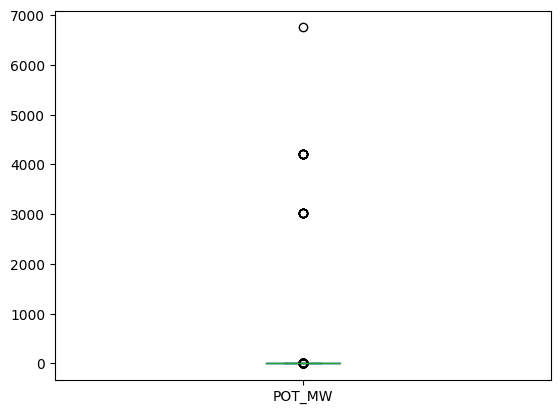

In [5]:
data['POT_MW'].plot.box()

Como se pode ver, há alguns *outliers*, com valores de potência da ordem de milhares de megawatts, o que é incompatível com a faixa esperada para potências de aerogeradores, que é no máximo de algumas dezenas de megawatts. Veja que, ao remover esses pontos fora da curva, obtem-se uma distribuição muito mais razoável.

<Axes: >

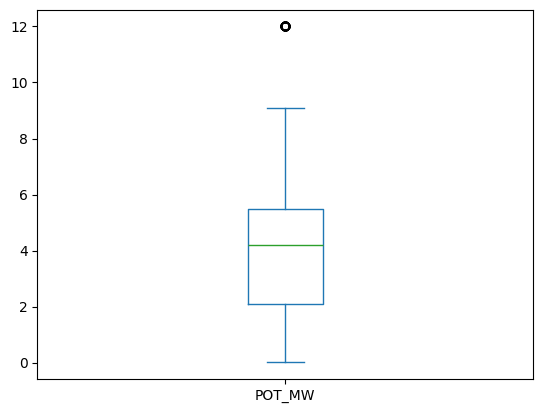

In [6]:
data['POT_MW'][data['POT_MW'] < 1000].plot.box()

Uma das formas de tratar esse problema seria simplesmente descartar esses *outliers*, mas eu não gostaria de perder esses dados, e os valores parecem muito estar ampliados por um fator de 1000. Isso pode acontecer por exemplo por um erro de cadastro, se tiver sido informado o valor da potência em kilowatts em vez de megawatts. Sendo assim, vou trabalhar com essa hipótese e aplicar um fator de 1/1000 nesses valores.

In [7]:
data['POT_MW'] = np.where(data['POT_MW'] >= 1000, data['POT_MW'] / 1000, data['POT_MW'])

Com os valores de potência devidamente tratados, passamos às características geométricas dos aerogeradores: altura total, altura da torre, e diâmetro do rotor. Espera-se que essas três variáveis se relacionem através da equação
$$H_\mathrm{total} = H_\mathrm{torre} + \frac{D}{2}.$$
Isso de fato se verifica para a grande maioria dos aerogeradores, conforme evidenciado pelo gráfico abaixo.

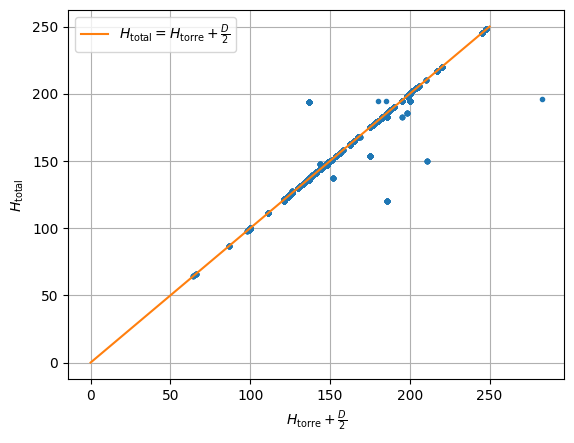

In [8]:
plt.plot(data['ALT_TORRE'] + data['DIAM_ROTOR']/2, data['ALT_TOTAL'], '.')
plt.plot([0, 250], [0, 250], '-', label=r'$H_\mathrm{total} = H_\mathrm{torre} + \frac{D}{2}$')
plt.xlabel(r'$H_\mathrm{torre} + \frac{D}{2}$')
plt.ylabel(r'$H_\mathrm{total}$')
plt.legend()
plt.grid()

Portanto, há redundância em guardar as três informações, já que a partir de quaisquer duas delas é possível calcular a terceira. Mesmo assim, manter todas as três colunas no conjunto de dados final pode ser útil no futuro, quando chegar a hora de preparar as visualizações para o *dashboard*.

Para encerrar o tratamento das informações geométricas, utiliza-se a relação entre as variáveis para preencher 4 valores faltantes na coluna de altura da torre.

In [9]:
data['ALT_TORRE'] = np.where(data['ALT_TORRE'].isna(), data['ALT_TOTAL'] - data['DIAM_ROTOR']/2, data['ALT_TORRE'])

No que diz respeito à coluna de data da atualização, a única operação a ser feita é converter do formato *Unix time* para o formato padrão de data.

In [10]:
data['DATA_ATUALIZACAO'] = pd.to_datetime(data['DATA_ATUALIZACAO'], unit='ms')
data

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,VERSAO,OPERACAO,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,LATITUDE,LONGITUDE
0,1.850,121.25,80.0,82.5,2022-10-24 15:37:27,30739.0,Caititu,CAI-083,Versão Válida,Sim,Central Eólica Caititu S.A.,None,1,BA,EOLCVBA030739-4-01,-14.470968,-42.642495
1,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30512.0,Dreen Boa Vista,BV07,Versão Válida,Sim,GE Boa Vista S.A.,None,2,RN,EOLCVRN030512-0-01,-5.115754,-35.924469
2,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30497.0,Renascença V,15,Versão Válida,Sim,Renascença V Energias Renováveis S.A.,None,3,RN,EOLCVRN030497-2-01,-5.267424,-35.844373
3,2.700,150.00,89.0,122.0,2022-10-24 15:37:27,30864.0,SM,1,Versão Válida,Sim,Santa Maria Energias Renováveis S.A.,None,4,RN,EOLCVRN030864-1-01,-5.442082,-35.923294
4,2.100,143.70,96.2,95.0,2022-10-24 15:37:27,30295.0,Colônia,AEG-08,Versão Válida,Sim,Central Geradora Eólica Colônia S.A.,None,5,CE,EOLCVCE030295-3-01,-3.540330,-38.879826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,2.000,149.38,108.0,82.0,2022-10-24 15:37:27,30349.0,Cerro Chato II,AEG 6,Versão Válida,Sim,Eletrosul Centrais Elétricas S.A.,None,23518,RS,EOLCVRS030349-6-01,-30.847180,-55.704673
23518,1.600,121.25,80.0,82.5,2022-10-24 15:37:27,30342.0,Guirapá,GUI_9,Versão Válida,Sim,Centrais Eólicas Guirapá Ltda.,None,23519,BA,EOLCVBA030342-9-01,-14.223984,-42.641430
23519,5.500,204.00,125.0,158.0,2023-01-10 17:53:57,38110.0,Ventos de São Roque 16,VSR16-03,Versão Válida,Sim,Enel Green Power Ventos de São Roque 16 S.A.,None,23520,PI,EOLCVPI038110-1-01,-8.908645,-41.595513
23520,3.465,186.00,120.0,132.0,2022-10-24 15:37:27,37073.0,São Fernando 1,SF1-01,Versão Válida,Sim,Ventos de São Fernando I Energia S.A.,None,23521,RN,EOLCVRN037073-8-01,-5.176915,-36.011283


Passa-se agora às informações do empreendimento, nas colunas EOL_VERSAO_ID, NOME_EOL, e CEG. Inspecionando a tabela classificada pela coluna NOME_EOL revela uma forte correlação entre as três informações, salvo algumas exceções que analisaremos abaixo. A tabela a seguir responde à seguinte pergunta: se dois aerogeradores fazem parte de empreendimentos com os mesmos nomes, as IDs dos empreendimentos são iguais? Isso é feito agrupando-se os dados pela coluna NOME_EOL e comparando os valores mínimo e máximo das IDs em cada grupo.

In [11]:
id_eol = data.groupby('NOME_EOL')['EOL_VERSAO_ID'].agg(['min', 'max'])
id_eol[id_eol['max'] != id_eol['min']]

,min,max
NOME_EOL,,
Canoa Quebrada,28649.0,28788.0
Santa Clara I,30292.0,32931.0
Santa Clara III,30293.0,32932.0
Santa Clara IV,30307.0,32933.0
Santa Clara V,30378.0,32934.0
Santa Clara VI,30304.0,32935.0
Santa Maria,29019.0,33909.0
São Manoel,31444.0,34820.0
São Miguel I,33644.0,72935.0


Como se vê, há 11 nomes de empreendimentos em que há uma discrepância entre as respectivas IDs. Inspecionando as linhas da tabela em que essa diferença ocorre (veja abaixo), pode-se ver que a coluna DEN_AEG (denominação do aerogerador) segue um mesmo padrão para empreendimentos com a mesma ID. Além disso, empreendimentos com o mesmo nome mas IDs distintas possuem uma quantidade diferente de aerogeradores, evidenciando que de fato se trata de empreendimentos distintos.

In [12]:
data[data['NOME_EOL'].isin(id_eol[(id_eol['max'] - id_eol['min']) > 1].index)].sort_values(['NOME_EOL', 'DEN_AEG'])

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,VERSAO,OPERACAO,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,LATITUDE,LONGITUDE
5277,2.1,124.0,80.0,88.0,2022-10-24 15:37:27,28788.0,Canoa Quebrada,UGE 01,Versão Válida,Sim,BVP Geradora de Energia S.A.,None,5278,CE,EOLCVCE028788-1-01,-4.474945,-37.740972
1002,2.1,124.0,80.0,88.0,2022-10-24 15:37:27,28788.0,Canoa Quebrada,UGE 02,Versão Válida,Sim,BVP Geradora de Energia S.A.,None,1003,CE,EOLCVCE028788-1-01,-4.473299,-37.741936
3900,2.1,124.0,80.0,88.0,2022-10-24 15:37:27,28788.0,Canoa Quebrada,UGE 03,Versão Válida,Sim,BVP Geradora de Energia S.A.,None,3901,CE,EOLCVCE028788-1-01,-4.471358,-37.742812
2966,2.1,124.0,80.0,88.0,2022-10-24 15:37:27,28788.0,Canoa Quebrada,UGE 04,Versão Válida,Sim,BVP Geradora de Energia S.A.,None,2967,CE,EOLCVCE028788-1-01,-4.469451,-37.743752
62,2.1,124.0,80.0,88.0,2022-10-24 15:37:27,28788.0,Canoa Quebrada,UGE 05,Versão Válida,Sim,BVP Geradora de Energia S.A.,None,63,CE,EOLCVCE028788-1-01,-4.467535,-37.744667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22199,4.5,200.0,125.0,150.0,2024-02-07 16:26:29,72937.0,São Miguel III,SMG III - 5,Versão Válida,Não,Vento Pampeiro Empreendimentos de Energia Reno...,None,22200,RS,EOLCVRS072937-0-01,-33.586415,-53.418307
22197,4.5,200.0,125.0,150.0,2024-02-07 16:26:29,72937.0,São Miguel III,SMG III - 6,Versão Válida,Não,Vento Pampeiro Empreendimentos de Energia Reno...,None,22198,RS,EOLCVRS072937-0-01,-33.588869,-53.413603
22196,4.5,200.0,125.0,150.0,2024-02-07 16:26:29,72937.0,São Miguel III,SMG III - 7,Versão Válida,Não,Vento Pampeiro Empreendimentos de Energia Reno...,None,22197,RS,EOLCVRS072937-0-01,-33.591227,-53.409177
22195,4.5,200.0,125.0,150.0,2024-02-07 16:26:29,72937.0,São Miguel III,SMG III - 8,Versão Válida,Não,Vento Pampeiro Empreendimentos de Energia Reno...,None,22196,RS,EOLCVRS072937-0-01,-33.593652,-53.404105


Portanto, o "erro" parece estar na coluna de nome do empreendimento. Mesmo havendo essa ambiguidade em alguns nomes, é interessante manter essa coluna, pois o nome tem uma apresentação melhor do que a ID em um *dashboard*.

Veja adicionalmente que há 9 IDs faltantes, conforme tabela abaixo, e é interessante preencher esses valores.

In [13]:
data[data['EOL_VERSAO_ID'].isna()]

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,VERSAO,OPERACAO,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,LATITUDE,LONGITUDE
23163,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-01,Versão Válida,1,None,None,23164,None,None,-5.249531,-35.839423
23164,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-02,Versão Válida,1,None,None,23165,None,None,-5.251080,-35.841020
23165,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-03,Versão Válida,1,None,None,23166,None,None,-5.253026,-35.842024
23166,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-04,Versão Válida,1,None,None,23167,None,None,-5.254011,-35.844104
23167,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-05,Versão Válida,1,None,None,23168,None,None,-5.255762,-35.845710
23168,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-06,Versão Válida,1,None,None,23169,None,None,-5.257232,-35.847351
23169,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-08,Versão Válida,1,None,None,23170,None,None,-5.266110,-35.824637
23170,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-09,Versão Válida,1,None,None,23171,None,None,-5.267865,-35.826414
23171,6.750,196.27,196.27,172.54,2025-04-15 13:43:02,NaN,Asa Branca III,AB-3-10,Versão Válida,1,None,None,23172,None,None,-5.215373,-35.872051


Veja que a denominação desses aerogeradores seguem o mesmo padrão, e todos se encontram próximos geograficamente, o que indica que eles fazem parte de um mesmo empreendimento. Portanto, as IDs serão preenchidas com o valor zero, que não é utilizado em nenhum outro empreendimento. Além disso, as IDs serão convertidas de `float64` para `int32`, a fim de economizar memória.

In [14]:
data['EOL_VERSAO_ID'] = data['EOL_VERSAO_ID'].fillna(0)
data['EOL_VERSAO_ID'] = data['EOL_VERSAO_ID'].astype(np.int32)

Agora, vamos analisar a coluna CEG, de [Código Único de Empreendimentos de Geração](https://www.gov.br/aneel/pt-br/empreendedores/geracao/ceg). Para todas as entradas no nosso conjunto de dados, os cinco primeiros caracteres do CEG são EOLCV, que indicam empreendimentos de energia eólica. Os dois caracteres seguintes descrevem a unidade federativa do empreendimento, mas como já há outra coluna com essa informação, essa parte do código também não oferece muita informação adicional. Seguindo a especificação do CEG, após a UF consta uma sequência numérica de 6 dígitos que nunca é alterada, e identifica cada empreendimento. O código abaixo calcula a diferença entre esse identificador numérico do CEG e a ID, e conta a frequência dessas diferenças.

In [15]:
(data['CEG'].str[7:13].fillna('0').astype(np.int32) - data['EOL_VERSAO_ID']).value_counts()

0       23502
3376       14
7200        6
Name: count, dtype: int64

Como se pode ver, na grande maioria dos casos, o CEG é igual à ID, e portanto não acrescenta informação útil para a análise. A linhas em que há divergência são mostradas na tabela abaixo.

In [16]:
data[data['CEG'].str[7:13].fillna('0').astype(np.int32) != data['EOL_VERSAO_ID']].sort_values(['EOL_VERSAO_ID', 'DEN_AEG'])

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,VERSAO,OPERACAO,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,LATITUDE,LONGITUDE
15140,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-01,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15141,RS,EOLCVRS034820-1-01,-31.584604,-53.448114
15147,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-01,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15148,RS,EOLCVRS034820-1-01,-31.584604,-53.448114
15141,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-02,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15142,RS,EOLCVRS034820-1-01,-31.580681,-53.448548
15148,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-02,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15149,RS,EOLCVRS034820-1-01,-31.580681,-53.448548
15142,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-03,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15143,RS,EOLCVRS034820-1-01,-31.571737,-53.451232
15149,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-03,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15150,RS,EOLCVRS034820-1-01,-31.571737,-53.451232
15143,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-04,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15144,RS,EOLCVRS034820-1-01,-31.567568,-53.451365
15150,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-04,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15151,RS,EOLCVRS034820-1-01,-31.567568,-53.451365
15144,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-05,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15145,RS,EOLCVRS034820-1-01,-31.562401,-53.454158
15151,4.2,220.0,145.0,150.0,2023-07-28 16:49:14,31444,São Manoel,SM-05,Versão Válida,Não,Empresa de Energia São Manoel S.A.,None,15152,RS,EOLCVRS034820-1-01,-31.562401,-53.454158


No caso de do empreendimento Gameleiras 12, a ID é 50875, enquanto o CEG é EOLCVMG***058075***-9-01, portanto trocaram-se os algarismos 0 e 8 no cadastro de um dos dois campos. Não há informação suficiente para decidir qual é a ID correta, mas como o único propósito dessa informação é identificar de forma única o empreendimento, não há prejuízo em manter o valor da coluna EOL_VERSAO_ID.

Já no empreendimento São Manoel, além da divergência entre ID e CEG, percebe-se algo mais crítico, que é a duplicação dos dados desses aerogeradores, como se pode ver pelas denominações (DEN_AEG) repetidas, bem como pelas coordenadas geográficas.

Sendo assim, pode-se descartar linhas em que se repetem as colunas 'EOL_VERSAO_ID', 'DEN_AEG', 'LATITUDE', e 'LONGITUDE', e também descartar a coluna CEG, que como vimos, não agrega valor ao conjunto de dados (para alguns usuários talvez fosse interessante a informação do CEG, mas vamos seguir com a hipótese de que o público alvo do *dashboard* não tem nenhuma utilidade para esse campo).

In [17]:
data = data.drop_duplicates({'EOL_VERSAO_ID', 'DEN_AEG', 'LATITUDE', 'LONGITUDE'})
data = data.drop('CEG', axis=1)
data

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,VERSAO,OPERACAO,PROPRIETARIO,ORIGEM,OBJECTID,UF,LATITUDE,LONGITUDE
0,1.850,121.25,80.0,82.5,2022-10-24 15:37:27,30739,Caititu,CAI-083,Versão Válida,Sim,Central Eólica Caititu S.A.,None,1,BA,-14.470968,-42.642495
1,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30512,Dreen Boa Vista,BV07,Versão Válida,Sim,GE Boa Vista S.A.,None,2,RN,-5.115754,-35.924469
2,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30497,Renascença V,15,Versão Válida,Sim,Renascença V Energias Renováveis S.A.,None,3,RN,-5.267424,-35.844373
3,2.700,150.00,89.0,122.0,2022-10-24 15:37:27,30864,SM,1,Versão Válida,Sim,Santa Maria Energias Renováveis S.A.,None,4,RN,-5.442082,-35.923294
4,2.100,143.70,96.2,95.0,2022-10-24 15:37:27,30295,Colônia,AEG-08,Versão Válida,Sim,Central Geradora Eólica Colônia S.A.,None,5,CE,-3.540330,-38.879826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,2.000,149.38,108.0,82.0,2022-10-24 15:37:27,30349,Cerro Chato II,AEG 6,Versão Válida,Sim,Eletrosul Centrais Elétricas S.A.,None,23518,RS,-30.847180,-55.704673
23518,1.600,121.25,80.0,82.5,2022-10-24 15:37:27,30342,Guirapá,GUI_9,Versão Válida,Sim,Centrais Eólicas Guirapá Ltda.,None,23519,BA,-14.223984,-42.641430
23519,5.500,204.00,125.0,158.0,2023-01-10 17:53:57,38110,Ventos de São Roque 16,VSR16-03,Versão Válida,Sim,Enel Green Power Ventos de São Roque 16 S.A.,None,23520,PI,-8.908645,-41.595513
23520,3.465,186.00,120.0,132.0,2022-10-24 15:37:27,37073,São Fernando 1,SF1-01,Versão Válida,Sim,Ventos de São Fernando I Energia S.A.,None,23521,RN,-5.176915,-36.011283


Perceba que ao excluir os registros de aerogeradores duplicados, 22 linhas foram excluídas, portanto havia outro(s) empreendimento(s) além de São Manoel em que esse problema ocorria.

Seguindo na análise exploratória dos dados, temos a coluna DEN_AEG, cuja informação é importante, pois especifica aerogeradores específicos em um determinado empreendimento. Conforme se vê abaixo, não há valores faltantes nessa coluna, e apesar de haver algumas duplicações para um mesmo empreendimento, o fato de as coordenadas serem diferentes indicam que cada registro na tabela corresponde a um e somente um aerogerador. Podemos portanto manter a coluna DEN_AEG como está e continuar a análise com as próximas colunas.

In [18]:
print(f'{data['DEN_AEG'].isna().sum()} missing values in column DEN_AEG.')
data[['EOL_VERSAO_ID', 'DEN_AEG']].value_counts().sort_values(ascending=False)

0 missing values in column DEN_AEG.


EOL_VERSAO_ID  DEN_AEG 
30333          AEG02       6
32932          SC03-4      2
32933          SC04-4      2
32934          SC05-4      2
32935          SC06-4      2
                          ..
33006          VSA02-07    1
               VSA02-06    1
               VSA02-05    1
               VSA02-04    1
33007          VSA03-05    1
Name: count, Length: 23488, dtype: int64

Vamos seguir para duas colunas inúteis no conjunto de dados, VERSAO e ORIGEM. Enquanto esta possui todos seus valores indisponíveis, aquela possui todos seus valores iguais a `'Versão Válida'`. Portanto, não agregam nenhuma informação para o usuário do *dashboard*, e podem ser descartadas.

In [19]:
print(f'{data['ORIGEM'].isna().sum()} missing values in column ORIGEM.')
print(data['VERSAO'].value_counts())
data = data.drop(['VERSAO', 'ORIGEM'], axis=1)
data

23500 missing values in column ORIGEM.
VERSAO
Versão Válida    23500
Name: count, dtype: int64


,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,OPERACAO,PROPRIETARIO,OBJECTID,UF,LATITUDE,LONGITUDE
0,1.850,121.25,80.0,82.5,2022-10-24 15:37:27,30739,Caititu,CAI-083,Sim,Central Eólica Caititu S.A.,1,BA,-14.470968,-42.642495
1,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30512,Dreen Boa Vista,BV07,Sim,GE Boa Vista S.A.,2,RN,-5.115754,-35.924469
2,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30497,Renascença V,15,Sim,Renascença V Energias Renováveis S.A.,3,RN,-5.267424,-35.844373
3,2.700,150.00,89.0,122.0,2022-10-24 15:37:27,30864,SM,1,Sim,Santa Maria Energias Renováveis S.A.,4,RN,-5.442082,-35.923294
4,2.100,143.70,96.2,95.0,2022-10-24 15:37:27,30295,Colônia,AEG-08,Sim,Central Geradora Eólica Colônia S.A.,5,CE,-3.540330,-38.879826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,2.000,149.38,108.0,82.0,2022-10-24 15:37:27,30349,Cerro Chato II,AEG 6,Sim,Eletrosul Centrais Elétricas S.A.,23518,RS,-30.847180,-55.704673
23518,1.600,121.25,80.0,82.5,2022-10-24 15:37:27,30342,Guirapá,GUI_9,Sim,Centrais Eólicas Guirapá Ltda.,23519,BA,-14.223984,-42.641430
23519,5.500,204.00,125.0,158.0,2023-01-10 17:53:57,38110,Ventos de São Roque 16,VSR16-03,Sim,Enel Green Power Ventos de São Roque 16 S.A.,23520,PI,-8.908645,-41.595513
23520,3.465,186.00,120.0,132.0,2022-10-24 15:37:27,37073,São Fernando 1,SF1-01,Sim,Ventos de São Fernando I Energia S.A.,23521,RN,-5.176915,-36.011283


A coluna OPERACAO contem uma informação relevante para a análise dos dados. Como se vê abaixo, a maioria das entradas contem `'Não'` ou `'Sim'` nesse campo, mas em 17 linhas consta o valor `'1'`, que eu acredito que deveria significar `'Sim'`, ou seja, que o aerogerador está em operação.

In [20]:
data['OPERACAO'].value_counts()

OPERACAO
Não    12868
Sim    10413
1         17
Name: count, dtype: int64

Portanto, vamos padronizar essa coluna como um tipo booleano.

In [21]:
data = data.replace({'Não': False, 'Sim': True, '1': True})

Para a coluna PROPRIETARIO, não há o que se fazer. É uma informação importante, e portanto deve ser mantida na tabela final, apesar de haver valores faltantes nos 9 aerogeradores do empreendimento Asa Branca III (ver abaixo).

In [22]:
data[data['PROPRIETARIO'].isna()]

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,OPERACAO,PROPRIETARIO,OBJECTID,UF,LATITUDE,LONGITUDE
23163,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-01,True,None,23164,None,-5.249531,-35.839423
23164,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-02,True,None,23165,None,-5.251080,-35.841020
23165,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-03,True,None,23166,None,-5.253026,-35.842024
23166,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-04,True,None,23167,None,-5.254011,-35.844104
23167,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-05,True,None,23168,None,-5.255762,-35.845710
23168,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-06,True,None,23169,None,-5.257232,-35.847351
23169,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-08,True,None,23170,None,-5.266110,-35.824637
23170,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-09,True,None,23171,None,-5.267865,-35.826414
23171,6.750,196.27,196.27,172.54,2025-04-15 13:43:02,0,Asa Branca III,AB-3-10,True,None,23172,None,-5.215373,-35.872051


A coluna OBJECTID é um identificador único associado a cada entrada lida da API da ANEEL. Sendo assim, é um bom candidato para o índice do `DataFrame`. Mantendo essa informação no conjunto de dados, é possível cruzar as informações da tabela com as *queries* da API, caso venha a ser necessário.

In [23]:
data = data.set_index('OBJECTID')
data

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,OPERACAO,PROPRIETARIO,UF,LATITUDE,LONGITUDE
OBJECTID,,,,,,,,,,,,,
1,1.850,121.25,80.0,82.5,2022-10-24 15:37:27,30739,Caititu,CAI-083,True,Central Eólica Caititu S.A.,BA,-14.470968,-42.642495
2,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30512,Dreen Boa Vista,BV07,True,GE Boa Vista S.A.,RN,-5.115754,-35.924469
3,2.000,145.00,95.0,100.0,2022-10-24 15:37:27,30497,Renascença V,15,True,Renascença V Energias Renováveis S.A.,RN,-5.267424,-35.844373
4,2.700,150.00,89.0,122.0,2022-10-24 15:37:27,30864,SM,True,True,Santa Maria Energias Renováveis S.A.,RN,-5.442082,-35.923294
5,2.100,143.70,96.2,95.0,2022-10-24 15:37:27,30295,Colônia,AEG-08,True,Central Geradora Eólica Colônia S.A.,CE,-3.540330,-38.879826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,2.000,149.38,108.0,82.0,2022-10-24 15:37:27,30349,Cerro Chato II,AEG 6,True,Eletrosul Centrais Elétricas S.A.,RS,-30.847180,-55.704673
23519,1.600,121.25,80.0,82.5,2022-10-24 15:37:27,30342,Guirapá,GUI_9,True,Centrais Eólicas Guirapá Ltda.,BA,-14.223984,-42.641430
23520,5.500,204.00,125.0,158.0,2023-01-10 17:53:57,38110,Ventos de São Roque 16,VSR16-03,True,Enel Green Power Ventos de São Roque 16 S.A.,PI,-8.908645,-41.595513


Finalmente, temos a informação da coluna UF, que é interessante de disponibilizar no *dashboard*, mas que contem valores faltantes nos 9 aerogeradores de Asa Branca III.

In [24]:
data[data['UF'].isna()]

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,OPERACAO,PROPRIETARIO,UF,LATITUDE,LONGITUDE
OBJECTID,,,,,,,,,,,,,
23164,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-01,True,None,None,-5.249531,-35.839423
23165,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-02,True,None,None,-5.251080,-35.841020
23166,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-03,True,None,None,-5.253026,-35.842024
23167,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-04,True,None,None,-5.254011,-35.844104
23168,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-05,True,None,None,-5.255762,-35.845710
23169,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-06,True,None,None,-5.257232,-35.847351
23170,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-08,True,None,None,-5.266110,-35.824637
23171,3.032,150.00,150.00,122.00,2025-04-15 13:43:02,0,Asa Branca III,AB-3-09,True,None,None,-5.267865,-35.826414
23172,6.750,196.27,196.27,172.54,2025-04-15 13:43:02,0,Asa Branca III,AB-3-10,True,None,None,-5.215373,-35.872051


Conferindo as coordenadas desses aerogeradores no [Google Maps](https://google.com/maps), vemos que eles se situam no Rio Grande do Norte, o que nos permite preencher corretamente os valores faltantes.

In [25]:
data['UF'] = data['UF'].fillna('RN')
data['UF'].value_counts()

UF
BA    8172
RN    5314
RS    2895
CE    2059
PI    2045
PB    1405
PE     755
MG     330
SC     194
MA     193
PR      76
SE      23
AL      22
RJ      17
Name: count, dtype: int64

Finalmente, vamos salvar o `DataFrame` com os dados validados em um arquivo que servirá como base de dados para o *dashboard* no [Tableau Public](https://public.tableau.com/views/CaseCdV/Painel1?:language=pt-BR&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).

In [26]:
data.to_csv('../outputs/output.csv')

Após construir o *dashboard*, terminaram não sendo necessárias algumas colunas. Portanto, vamos salvar um novo arquivo .csv com apenas as informações que são de fato utilizadas na visualização final, para melhorar a responsividade do painel.

In [27]:
data.to_csv('../outputs/data_for_dashboard.csv', columns=['POT_MW', 'DIAM_ROTOR', 'DATA_ATUALIZACAO',
                                                          'NOME_EOL', 'DEN_AEG', 'OPERACAO', 'PROPRIETARIO',
                                                          'UF', 'LATITUDE', 'LONGITUDE'])